# Домашнее задание по статистическому анализу на python

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [41]:
url = "http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df = pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [42]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [43]:
df.shape

(156, 11)

Проверим отсутствующие значения:

In [44]:
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

Отчистим пустое значение

In [47]:
df.dropna(subset=['Freedom'], inplace=True)

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

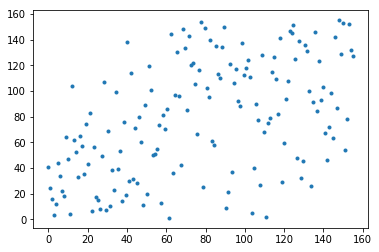

In [57]:
len_column = len(df['Positive affect']) # сколько значений в колонке
x = np.linspace(0, len_column, len_column)
plt.scatter(x, df['Positive affect'], marker='.')

(array([16., 15., 16., 15., 15., 16., 15., 16., 15., 16.]),
 array([  1. ,  16.4,  31.8,  47.2,  62.6,  78. ,  93.4, 108.8, 124.2,
        139.6, 155. ]),
 <a list of 10 Patch objects>)

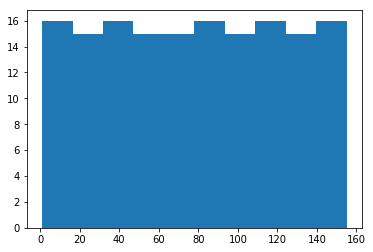

In [53]:
plt.hist(df['Positive affect'])

Видно что распределение не нормальное, зависимостей нет

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [76]:
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  78.0


In [78]:
print('Математическое ожидание: ', statistics.mean(df['Freedom']))

Математическое ожидание:  78.0


In [80]:
print('Минимум: ', min(df['Freedom']))

Минимум:  1.0


In [81]:
print('Максимум: ', max(df['Freedom']))

Максимум:  155.0


In [83]:
print('Стандартное отклонение: ', statistics.pstdev(df['Freedom']))

Стандартное отклонение:  44.74371464239419


In [85]:
print('Дисперсия: ', statistics.pvariance(df['Freedom']))

Дисперсия:  2002.0


In [86]:
duration_range = max(df['Freedom']) - min(df['Freedom'])
print('Размах: ', duration_range)

Размах:  154.0


In [88]:
print('Выбросы: ', df['Freedom'].isnull().sum())

Выбросы:  0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

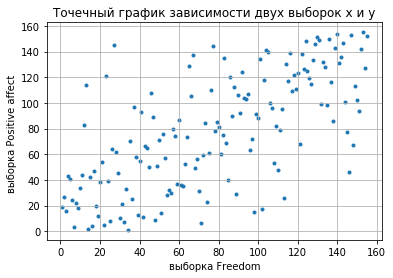

In [94]:
duration = df['Freedom']
avg_vote = df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect ')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(duration, avg_vote, marker='.')

In [96]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['Freedom'], df['Positive affect'])
print(corr)

0.6817698430601656


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [98]:
Freedom = df['Freedom'] - statistics.mean(df['Freedom'])

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

Freedom_ = min_max_scaler.fit_transform(np.array(Freedom).reshape(-1, 1))
print(min(Freedom_))
print(max(Freedom_))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

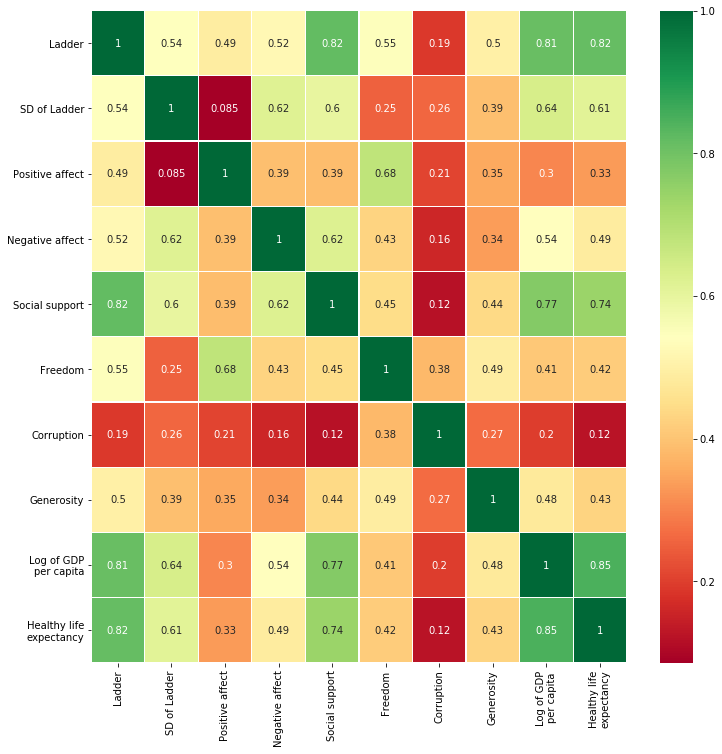

In [99]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [101]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Сделать частотный график колонки AveragePrice. Какое это распределение?

(array([ 331., 2632., 4824., 4506., 3412., 1672.,  598.,  177.,   86.,
          11.]),
 array([0.44 , 0.721, 1.002, 1.283, 1.564, 1.845, 2.126, 2.407, 2.688,
        2.969, 3.25 ]),
 <a list of 10 Patch objects>)

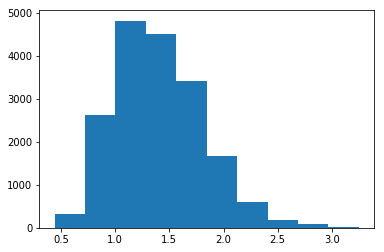

In [102]:
plt.hist(df['AveragePrice'])

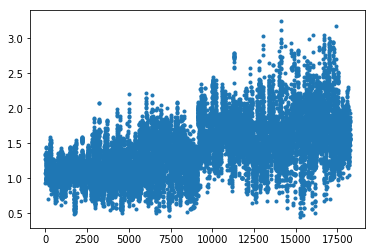

In [103]:
len_column = len(df['AveragePrice']) # сколько значений в колонке
x = np.linspace(0, len_column, len_column)
plt.scatter(x, df['AveragePrice'], marker='.')

Это нормальное распределение

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

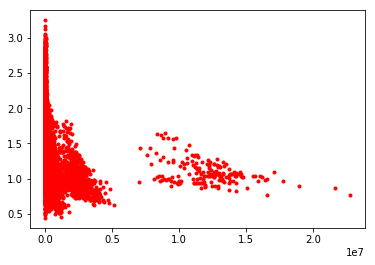

In [107]:
plt.plot(df['4046'], df['AveragePrice'], 'r.')
plt.show()

In [109]:
corr, p_value = pearsonr(df['4046'], df['AveragePrice'])
print(corr)

-0.20831704848788477


Видим что корелляция отрицательная, т.е. ее нет